In [2]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datasets import load_dataset
from utils.plotting import scatter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [6]:
wine_data, wine_features = load_dataset.wine()

In [18]:
wine_data["class"].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

Text(0, 0.5, 'No datapoints')

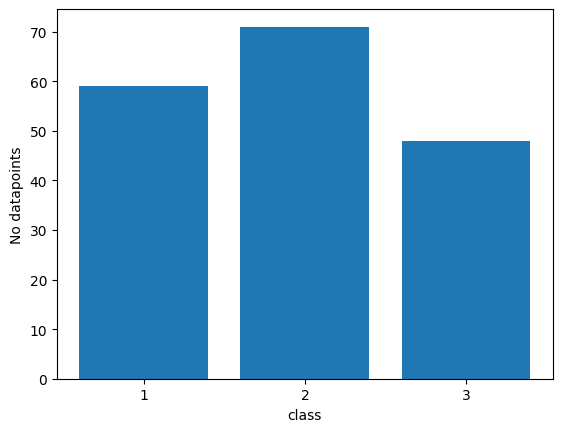

In [20]:
plt.bar([2, 1, 3], wine_data["class"].value_counts())
plt.xticks([1, 2, 3])
plt.xlabel("class")
plt.ylabel("No datapoints")

In [15]:
len(wine_data)

178

In [7]:
wine_data["class"].unique()

array([1, 2, 3], dtype=int64)

In [8]:
x = wine_features
y = wine_data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Text(0, 0.5, 'No datapoints')

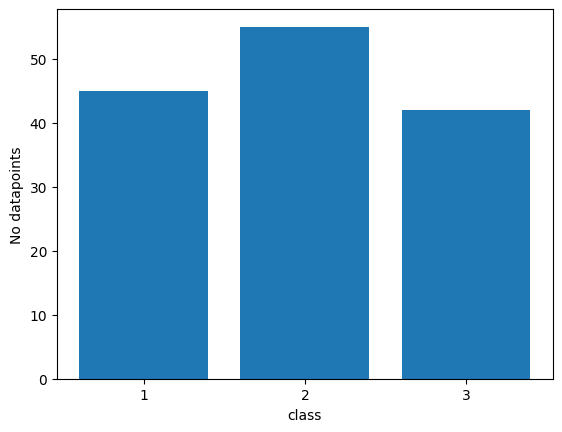

In [29]:
plt.bar([2, 1, 3], y_train.value_counts())
plt.xticks([1, 2, 3])
plt.xlabel("class")
plt.ylabel("No datapoints")

Text(0, 0.5, 'No datapoints')

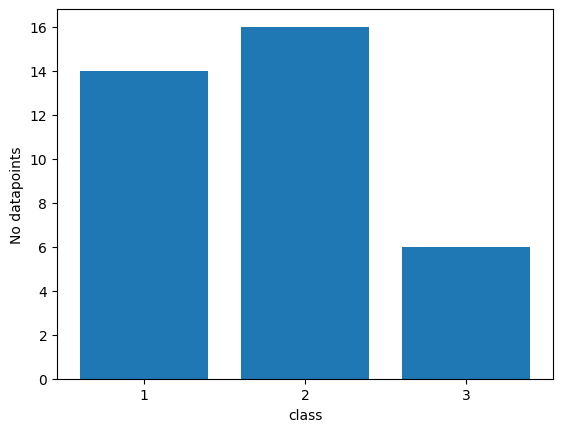

In [30]:
plt.bar([2, 1, 3], y_test.value_counts())
plt.xticks([1, 2, 3])
plt.xlabel("class")
plt.ylabel("No datapoints")

In [31]:
# import random forest classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators = 100
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators)
bagging_clf.fit(x_train, y_train)

d:\ml2\.venv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

d:\ml2\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\ml2\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\ml2\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\ml2\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\ml2\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\ml2\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\ml2\.venv\lib\site-

Text(0, 0.5, 'Accuracy')

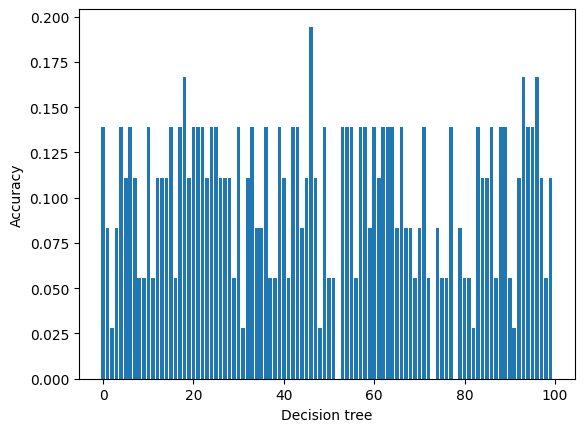

In [39]:
tree_accuracy = []
for tree in bagging_clf.estimators_:
    y_pred = tree.predict(x_test)
    score = tree.score(x_test, y_test)
    tree_accuracy.append(score)


plt.bar(np.arange(0, 100), tree_accuracy)
plt.xlabel("Decision tree")
plt.ylabel("Accuracy")



In [40]:
# take the average of the individual errors of the trees
individual_error = sum(tree_accuracy) / len(tree_accuracy)
print("individual accuracy: ", individual_error)

# calculate the ensemble error
y_pred = bagging_clf.predict(x_test)
ensemble_error = bagging_clf.score(x_test, y_test)

print("Ensemble accuracy: ", ensemble_error)


individual accuracy:  0.10166666666666668
Ensemble accuracy:  0.8888888888888888


[[12  2  0]
 [ 0 14  2]
 [ 0  0  6]]


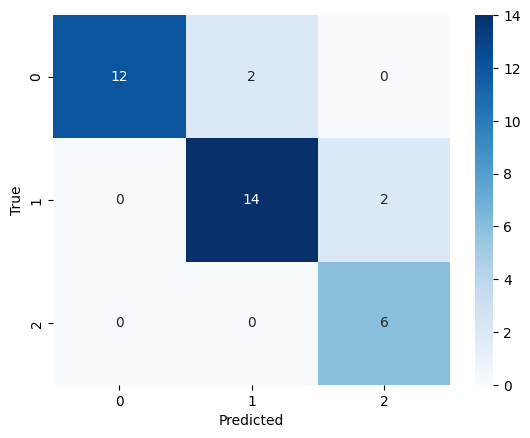

In [41]:
# draw the table of the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_mat)

# draw the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
